In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now let’s check that if our dataset have null values or not

In [5]:
diabetes_df.isnull().head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


Now let’s check the number of null values our dataset has.

In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from the above code we first checked that is there any null values from the IsNull() function then we are going to take the sum of all those missing values from the sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [7]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
# Showing the Count of NANs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


DATA VISUALIZATION

C:\Users\91762\AppData\Local\Temp\ipykernel_7760\1206729039.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df_copy[column])
C:\Users\91762\AppData\Local\Temp\ipykernel_7760\1206729039.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_df_copy[column])
C:\Users\91762\AppDa

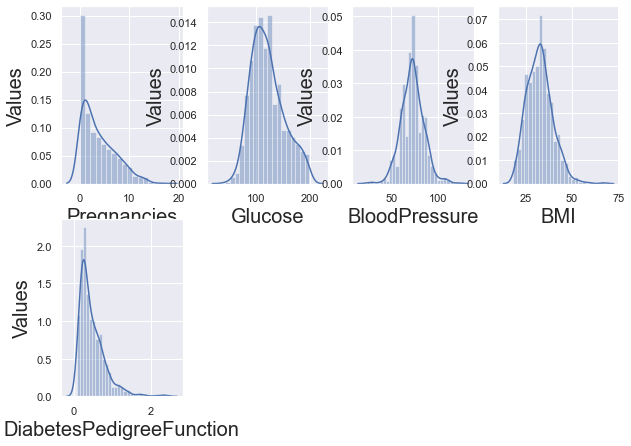

In [44]:
plt.figure(figsize=(10,15))
plotnumber=1

for column in diabetes_df_copy:
    if plotnumber<6:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(diabetes_df_copy[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

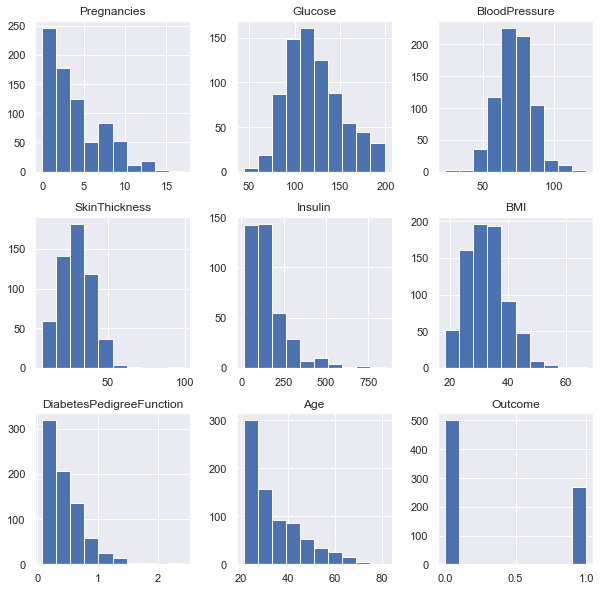

In [9]:
#Plotting the data distribution plots before removing null values
p = diabetes_df_copy.hist(figsize = (10,10))

In [10]:
#Removal of skin thickness and insulin
diabetes_df_copy=diabetes_df_copy.drop(['SkinThickness','Insulin'], axis=1)

Inference: So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

Now we will be imputing the mean value of the column to each missing value of that particular column.

In [11]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

0    500
1    268
Name: Outcome, dtype: int64


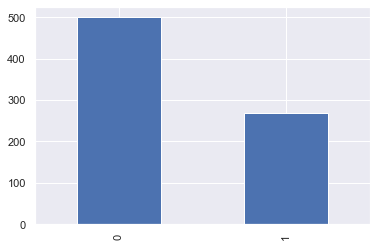

In [12]:
#Now, let’s check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

Scaling the Data
Before scaling down the data let’s have a look into it

In [13]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


Scaling the data

In [14]:
min_max_list=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]

min_max_list[0][0]=diabetes_df_copy['Pregnancies'].min()
min_max_list[0][1]=diabetes_df_copy['Pregnancies'].max()

min_max_list[1][0]=diabetes_df_copy['Glucose'].min()
min_max_list[1][1]=diabetes_df_copy['Glucose'].max()

min_max_list[2][0]=diabetes_df_copy['BloodPressure'].min()
min_max_list[2][1]=diabetes_df_copy['BloodPressure'].max()

min_max_list[3][0]=diabetes_df_copy['BMI'].min()
min_max_list[3][1]=diabetes_df_copy['BMI'].max()

min_max_list[4][0]=diabetes_df_copy['DiabetesPedigreeFunction'].min()
min_max_list[4][1]=diabetes_df_copy['DiabetesPedigreeFunction'].max()


min_max_list[5][0]=diabetes_df_copy['Age'].min()
min_max_list[5][1]=diabetes_df_copy['Age'].max()




In [15]:
print(min_max_list)

[[0, 17], [44.0, 199.0], [24.0, 122.0], [18.2, 67.1], [0.078, 2.42], [21, 81]]


In [16]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X=  pd.DataFrame(scaler.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies','Glucose', 'BloodPressure','BMI','DiabetesPedigreeFunction', 'Age'])
y=diabetes_df_copy['Outcome']
print(X.head(1))

   Pregnancies   Glucose  BloodPressure       BMI  DiabetesPedigreeFunction  \
0     0.352941  0.670968       0.489796  0.314928                  0.234415   
1     0.058824  0.264516       0.428571  0.171779                  0.116567   
2     0.470588  0.896774       0.408163  0.104294                  0.253629   
3     0.058824  0.290323       0.428571  0.202454                  0.038002   
4     0.000000  0.600000       0.163265  0.509202                  0.943638   

        Age  
0  0.483333  
1  0.166667  
2  0.183333  
3  0.000000  
4  0.200000  


In [45]:
print(X.head(1))

   Pregnancies   Glucose  BloodPressure       BMI  DiabetesPedigreeFunction  \
0     0.352941  0.670968       0.489796  0.314928                  0.234415   

        Age  
0  0.483333  


MODEL BUILDING

That’s how our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

Splitting the dataset

Now we will split the data into training and testing data using the train_test_split function

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=30)

1.KNEIGHBOURSCLASSIFIER MODEL BUILDING

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
from sklearn import metrics

predictions = knn.predict(X_train)
print("Accuracy Score on training  data=", format(metrics.accuracy_score(y_train, predictions)))

predictions = knn.predict(X_test)
print("Accuracy Score on test  data=", format(metrics.accuracy_score(y_test, predictions)))
Knn_acc=metrics.accuracy_score(y_test, predictions)

Accuracy Score on training  data= 0.8365758754863813
Accuracy Score on test  data= 0.7440944881889764


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       172
           1       0.60      0.60      0.60        82

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



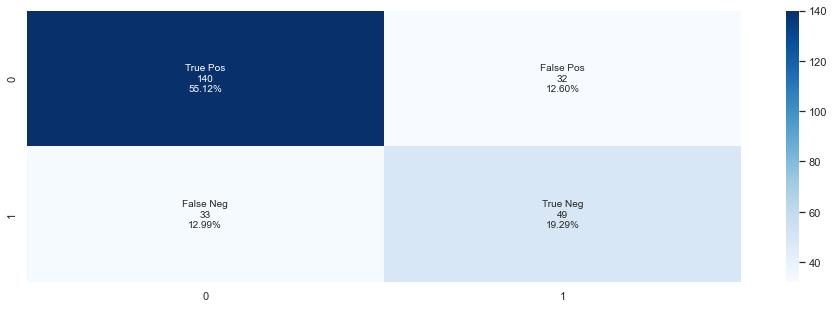

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,predictions))

SUPPORT VECTOR MACHINE MODEL BUILDING

In [22]:
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', C = 0.7, gamma = 0.01,probability=True)
classifier.fit(X_train, y_train)


# accuracy score on the training data
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test dataset
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)



Accuracy score of the training data :  0.7587548638132295
Accuracy score of the test data :  0.7795275590551181


In [ ]:

# from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, X_test_prediction))
# print(classification_report(y_test,X_test_prediction))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       172
           1       0.60      0.60      0.60        82

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



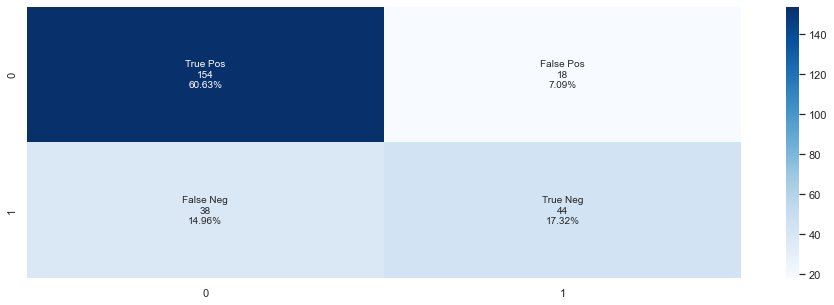

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,X_test_prediction)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues')

print(classification_report(y_test,predictions))

In [24]:
# Get coefficient magnitudes
coef_magnitudes = abs(classifier.coef_[0])

# Print feature importance
Svm_feature_importance=[]
for feature, importance in zip(X_train.columns, coef_magnitudes):
    Svm_feature_importance.append((feature, importance))

DECISION TREE MODEL BUILDING

In [25]:
# Decision Tree
# Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:

from sklearn import metrics

predictions = dtree.predict(X_train)
print("Accuracy Score on training data=", format(metrics.accuracy_score(y_train,predictions)))


predictions = dtree.predict(X_test)
print("Accuracy Score on test data =", format(metrics.accuracy_score(y_test,predictions)))

Dtree_acc=metrics.accuracy_score(y_test,predictions)

from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test,predictions)) 

Accuracy Score on training data= 1.0
Accuracy Score on test data = 0.7165354330708661


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       172
           1       0.56      0.61      0.58        82

    accuracy                           0.72       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.72      0.72       254



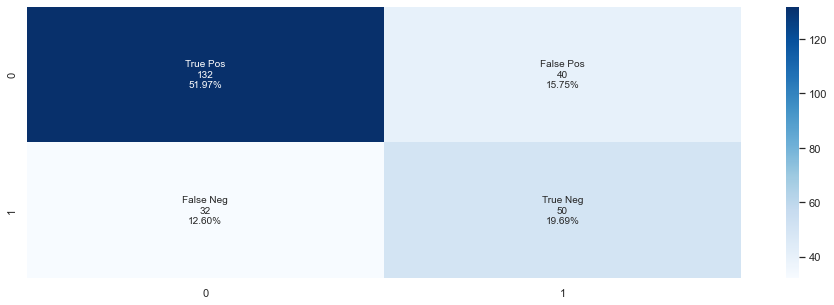

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,predictions)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,predictions))

In [ ]:

df_train, df_test, df_train, df_test = train_test_split(df_x,df_y, test_size=0.33,random_state=30)

LOGISTICS REGRESSION MODEL BUILDING

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
Train_pred=lr.predict(X_train)
y_pred = lr.predict(X_test)
print("Accuracy: on training  data", accuracy_score(y_train, Train_pred))
print("Accuracy: on test data", accuracy_score(y_test, y_pred))
Log_reg_acc=accuracy_score(y_test,y_pred)
# print("Confusion matrix:", confusion_matrix(y_test, y_pred))

# print(classification_report(y_test,y_pred))


Accuracy: on training  data 0.7665369649805448
Accuracy: on test data 0.7795275590551181


              precision    recall  f1-score   support

           0       0.80      0.77      0.79       172
           1       0.56      0.61      0.58        82

    accuracy                           0.72       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.72      0.72       254



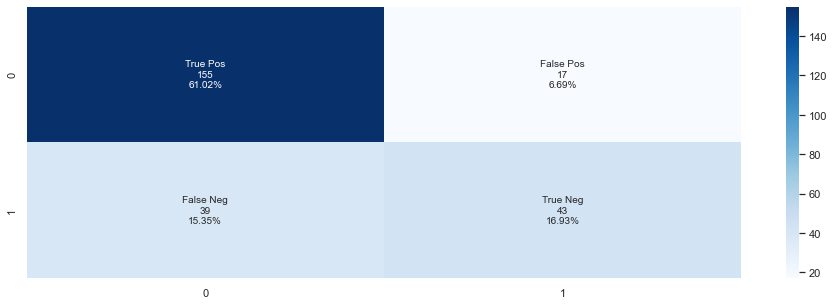

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

print(classification_report(y_test,predictions))

In [35]:

coef_magnitudes = abs(lr.coef_[0])
LogReg_feature_importance=[]
for feature, importance in zip(X_train.columns, coef_magnitudes):
    LogReg_feature_importance.append((feature, importance))

Feature Importance
Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

<Axes: >

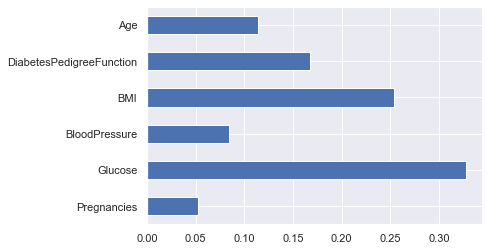

In [29]:
# Plotting the feature importance for the same
#Decision Tree Model
(pd.Series(dtree.feature_importances_, index=X.columns).plot(kind='barh'))


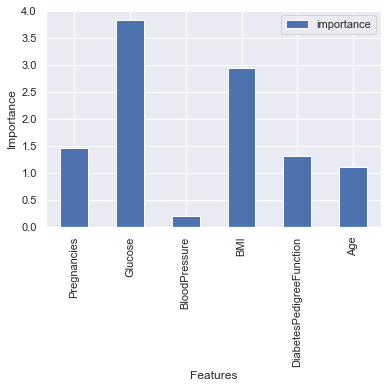

In [37]:
# Plotting the feature importance for the Logistic Regression Model

# Convert the list to a pandas DataFrame
Log_reg_df = pd.DataFrame(LogReg_feature_importance, columns=['feature', 'importance'])

Log_reg_df.plot(kind='bar' , x='feature', y='importance')

# Add axis labels
plt.xlabel('Features')
plt.ylabel('Importance')

# Display the plot
plt.show()

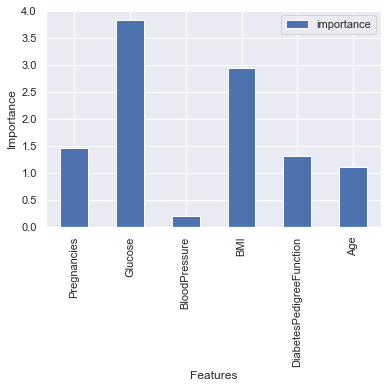

In [46]:
# Plotting the feature importance for the Support vector machine

# Convert the list to a pandas DataFrame
Svm_feature_importance = pd.DataFrame(Svm_feature_importance, columns=['feature', 'importance'])

Svm_feature_importance.plot(kind='bar' , x='feature', y='importance')

# Add axis labels
plt.xlabel('Features')
plt.ylabel('Importance')

# Display the plot
plt.show()

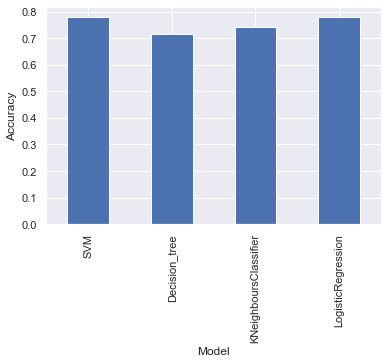

In [39]:
Accuracy_df = pd.DataFrame({
    'Model': ['SVM', 'Decision_tree','KNeighboursClassifier','LogisticRegression'],
    'Accuracy': [0.7795,0.7165,0.744,0.7795]
})

Accuracy_df.set_index('Model', inplace=True)

Accuracy_df.plot(kind='bar', legend=None)
plt.ylabel('Accuracy')
plt.show()

SELECTING THE MODEL AND SAVING IT

The Conclusion from Model Building is that Support Vector Machine  is the best model for this prediction since it has an accuracy_score of 0.7795 on test dataset.Hence we are saving this model using pickle function for classification.

In [40]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

# lastly, after loading that model we will use this to make predictions
print(loaded_model.predict(X_test))

loaded_model_accuracy = accuracy_score(loaded_model.predict(X_test), y_test)
print('Accuracy score of the loaded model on test data  test data : ', loaded_model_accuracy)



[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
Accuracy score of the loaded model on test data  test data :  0.7795275590551181


In [41]:

input_data = (1,85,66,26.6,0.351,31)

Pregnancies=input_data[0] 
Glucose=input_data[1] 
BloodPressure=input_data[2]
BMI=input_data[3]
DiabetesPedigreeFunction=input_data[4]
Age=input_data[5]

Pregnancies=(Pregnancies-min_max_list[0][0])/(min_max_list[0][1]-min_max_list[0][0])
Glucose=(Glucose-min_max_list[1][0])/(min_max_list[1][1]-min_max_list[1][0])
BloodPressure=(BloodPressure-min_max_list[2][0])/(min_max_list[2][1]-min_max_list[2][0])
BMI=(BMI-min_max_list[3][0])/(min_max_list[3][1]-min_max_list[3][0])
DiabetesPedigreeFunction=(DiabetesPedigreeFunction-min_max_list[4][0])/(min_max_list[4][1]-min_max_list[2][0])
Age=(Age-min_max_list[5][0])/(min_max_list[5][1]-min_max_list[5][0])

input_data=[Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic


c:\Users\91762\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
#saving the max , min of each column
with open('max_min', 'wb') as f:
        pickle.dump(min_max_list, f)

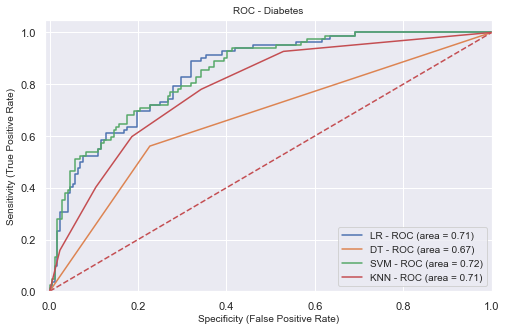

In [43]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtree,
},
{
    'label': 'SVM',
    'model': classifier,
},
{
    'label': 'KNN',
    'model': knn,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Positive Rate)', fontsize=10)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=10)
plt.title('ROC - Diabetes', fontsize=10)
plt.legend(loc="lower right", fontsize=10)
plt.show()